Semana #3 Repaso

In [17]:
import numpy as np
import matplotlib.pyplot as plt
##epsilon en este caso sera el error minimo que el computador detecta como indiferenciable entre un numero y otro. 
##lo que significa que epsilon sera nuestra aproximacion mas cercana a cero.
epsilon = 1

while 1 + epsilon != 1:
    epsilon *= 0.5
    
print(epsilon)

1.1102230246251565e-16


Distintas formas de encontrar la Derivada de una funcion:

In [18]:
def f(x):
    return np.sin(x)

In [19]:
##Dado un arreglo, el espacio  que separa al valor n del valor n+1
##Sera entonces el h a tomar en cuenta para las derivadas.
N = 50
x = np.linspace(0,2*np.pi,N)
h = x[1]-x[0]
h

0.1282282715750936

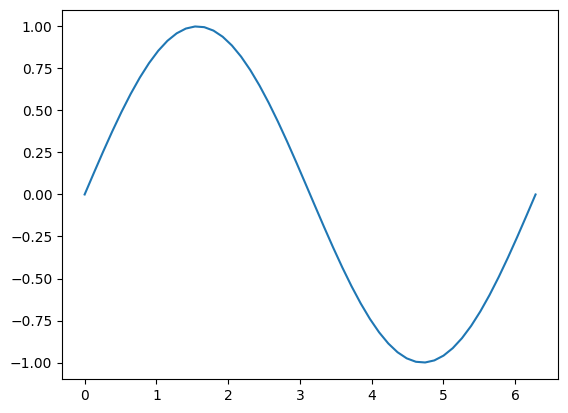

In [20]:
dx = f(x)
plt.plot(x,dx)

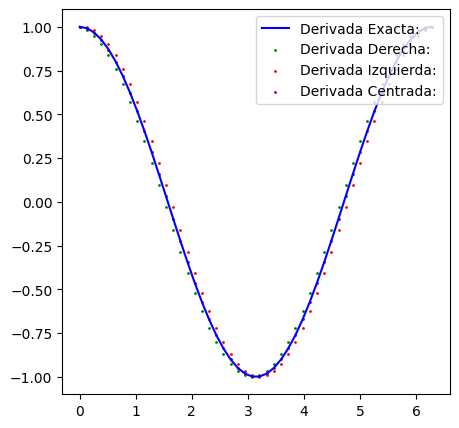

In [21]:
##Derivada:
def df_dx_exacta(x):
    return np.cos(x)

##Formas de derivadas no completamente exactas:
def df_dx_derecha(f,x,h):
    if h != 0:
        return (f(x+h)-f(x))/h

def df_dx_izquierda(f,x,h):
    if h != 0:
        return (f(x)-f(x-h))/h

def df_dx_centrada(f,x,h):
    if h != 0:
        return(f(x+h)-f(x-h))/(2*h)


fig,axs = plt.subplots()
dicc = {"Derivada Exacta:": (df_dx_exacta(x),'blue'),
        "Derivada Derecha:":(df_dx_derecha(f,x,h), 'green'),
        "Derivada Izquierda:":(df_dx_izquierda(f,x,h), 'red'),
        "Derivada Centrada:":(df_dx_centrada(f,x,h),'purple')
        }

fig.set_figwidth(5)
fig.set_figheight(5)


for key in dicc:
    if key == "Derivada Exacta:": 
        plt.plot(x,dicc.get(key)[0],label = key, color = dicc.get(key)[1])
    else:
        plt.scatter(x,dicc.get(key)[0],label =key, color =dicc.get(key)[1],s = 1)

axs.legend(loc='upper right')


Graficar el Error de cada derivada:


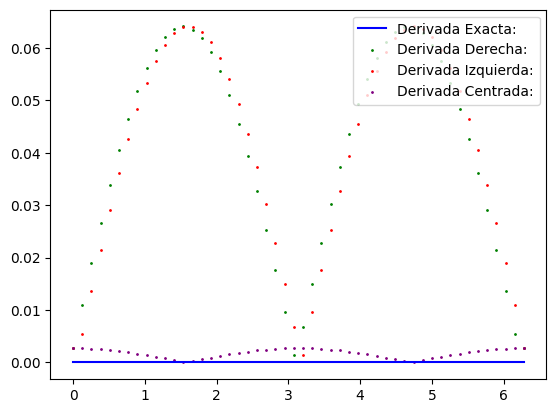

In [22]:
fig,axs = plt.subplots()
for key in dicc:
    dicc[key] = (np.abs(df_dx_exacta(x)-dicc[key][0]),dicc[key][1])
for key in dicc:
    if key == "Derivada Exacta:": 
        plt.plot(x,dicc.get(key)[0],label = key, color = dicc.get(key)[1])
    else:
        plt.scatter(x,dicc.get(key)[0],label =key, color =dicc.get(key)[1],s = 1)
axs.legend(loc='upper right')

Metodo Newton Raphson

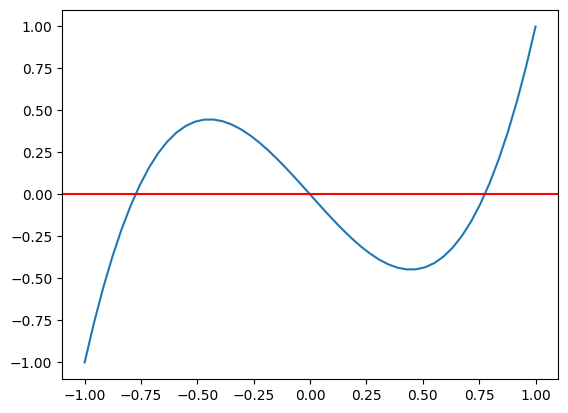

In [23]:
##Este metodo sirve para hallar las raices de un polinomio

def pol(x):
    return 0.5*(5*x**3 - 3*x)

x = np.linspace(-1,1,50)
y = pol(x)
plt.plot(x,y)
plt.axhline(y = 0,color='r')

In [24]:
def newton_raphson(f,df_dx,xi,itmax,preci):
    if df_dx(f,xi,1e-6) != 0:
        while itmax-1 >0 and np.abs(f(xi)/df_dx(f,xi,1e-6))>preci:
            xi = xi-(f(xi)/df_dx(f,xi,1e-6))
            itmax-=1
    else:
        print("Division por cero")
    return xi

print(pol(newton_raphson(pol,df_dx_centrada,0,100,10e-8)))

0.0
